In [2]:
import os
import graphviz # Debe instalar este paquete y programa
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from predictPy import Analisis_Predictivo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.tree import export_graphviz
from sklearn.neighbors import KNeighborsClassifier

<p style = "color: blue; font-size :40px;text-align:center;font-family:Times New Roman"> Tarea 2

# Pregunta 1: [25 puntos] [no usar `Python`] Para la (la variable a predecir es `Tipo`):

| Tipo | Color  |   Tamaño  |
|------|------|-----|
| 1 | Amarillo | Grande |
| 1   |Amarillo | Grande | 
| 0 | Amarillo | Pequeño |
| 1   |Azul | Pequeño | 
| 0 | Azul | Grande |
| 0   |Azul | Grande | 
| 0 | Azul | Pequeño |
| 1   |Amarillo | Pequeño | 
| 0 | Azul | Grande |
| 1   |Azul | Grande | 
| 1 | Azul | Grande |

## 1. Calcule la información ganada usando el índice do con la variable Color o iniciando con la variable Tamaño) ¿Cuál división es la mejor? ¿Por qué?

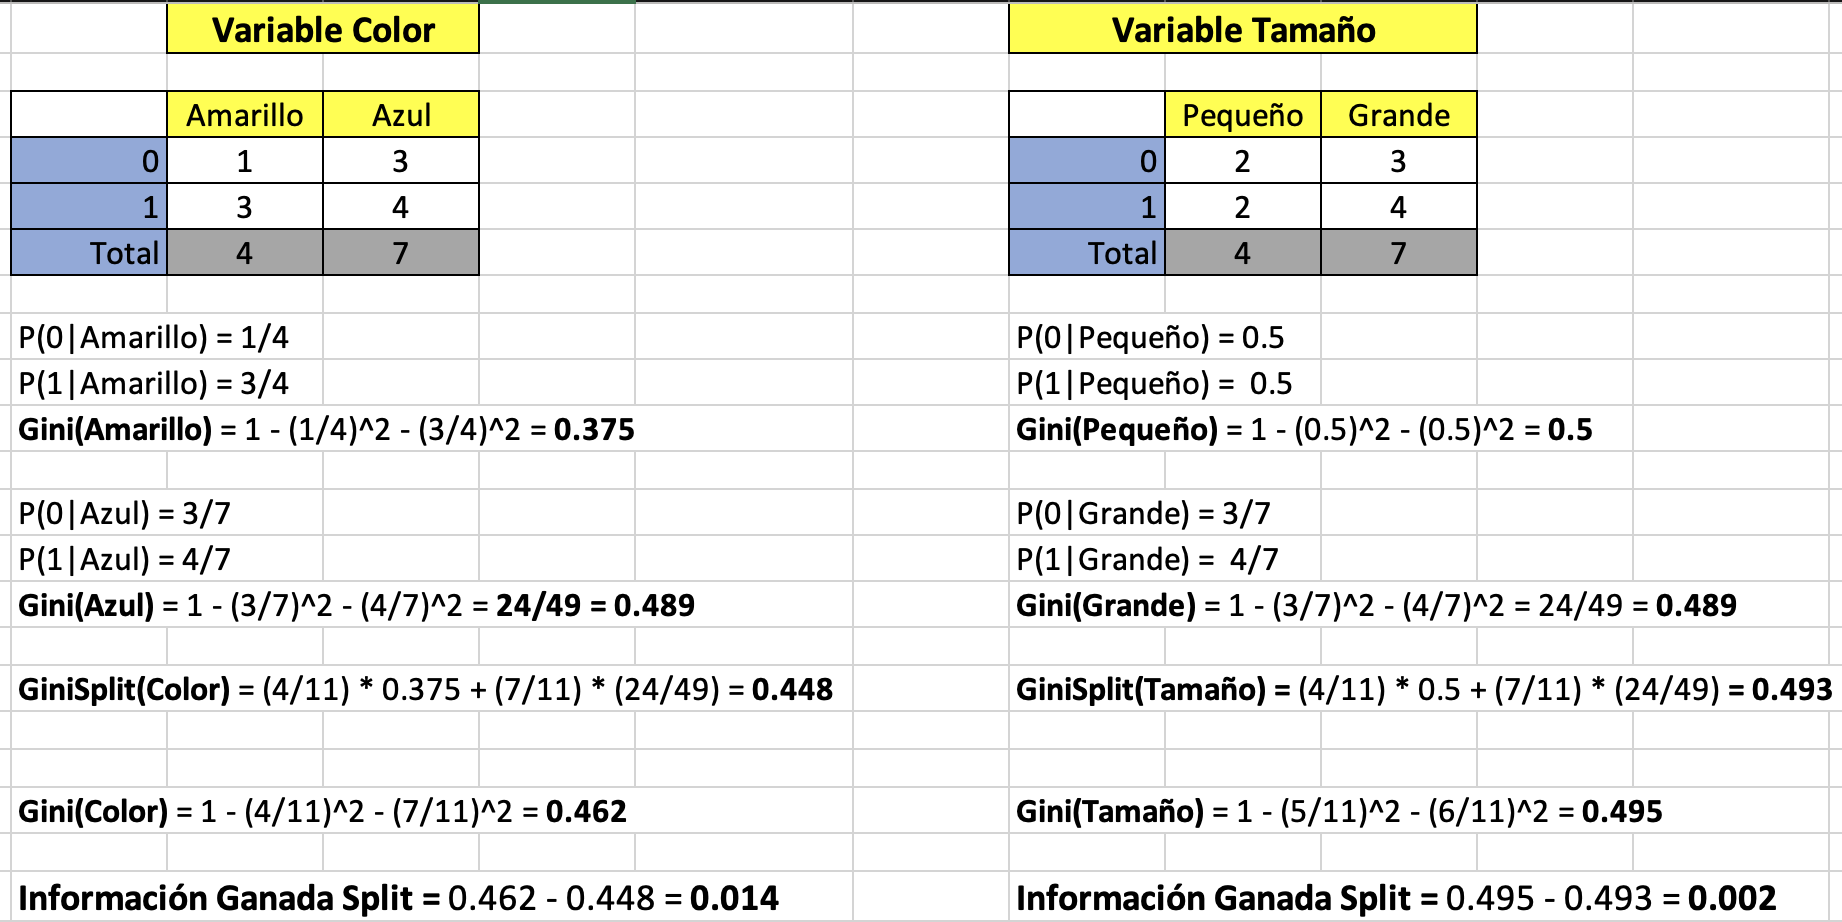

## 2. De acuerdo al resultado del ítem anterior, genere el árbol que representa todas las reglas de decisión. En caso de nodos hoja donde exista un empate en las clases de la varíable a predecir puede clasificar como usted desee. Puede utilizar cualquier herramienta para dibujar el árbol, inclusive puede hacerlo a mano. El dibujo debe ser completamente legible

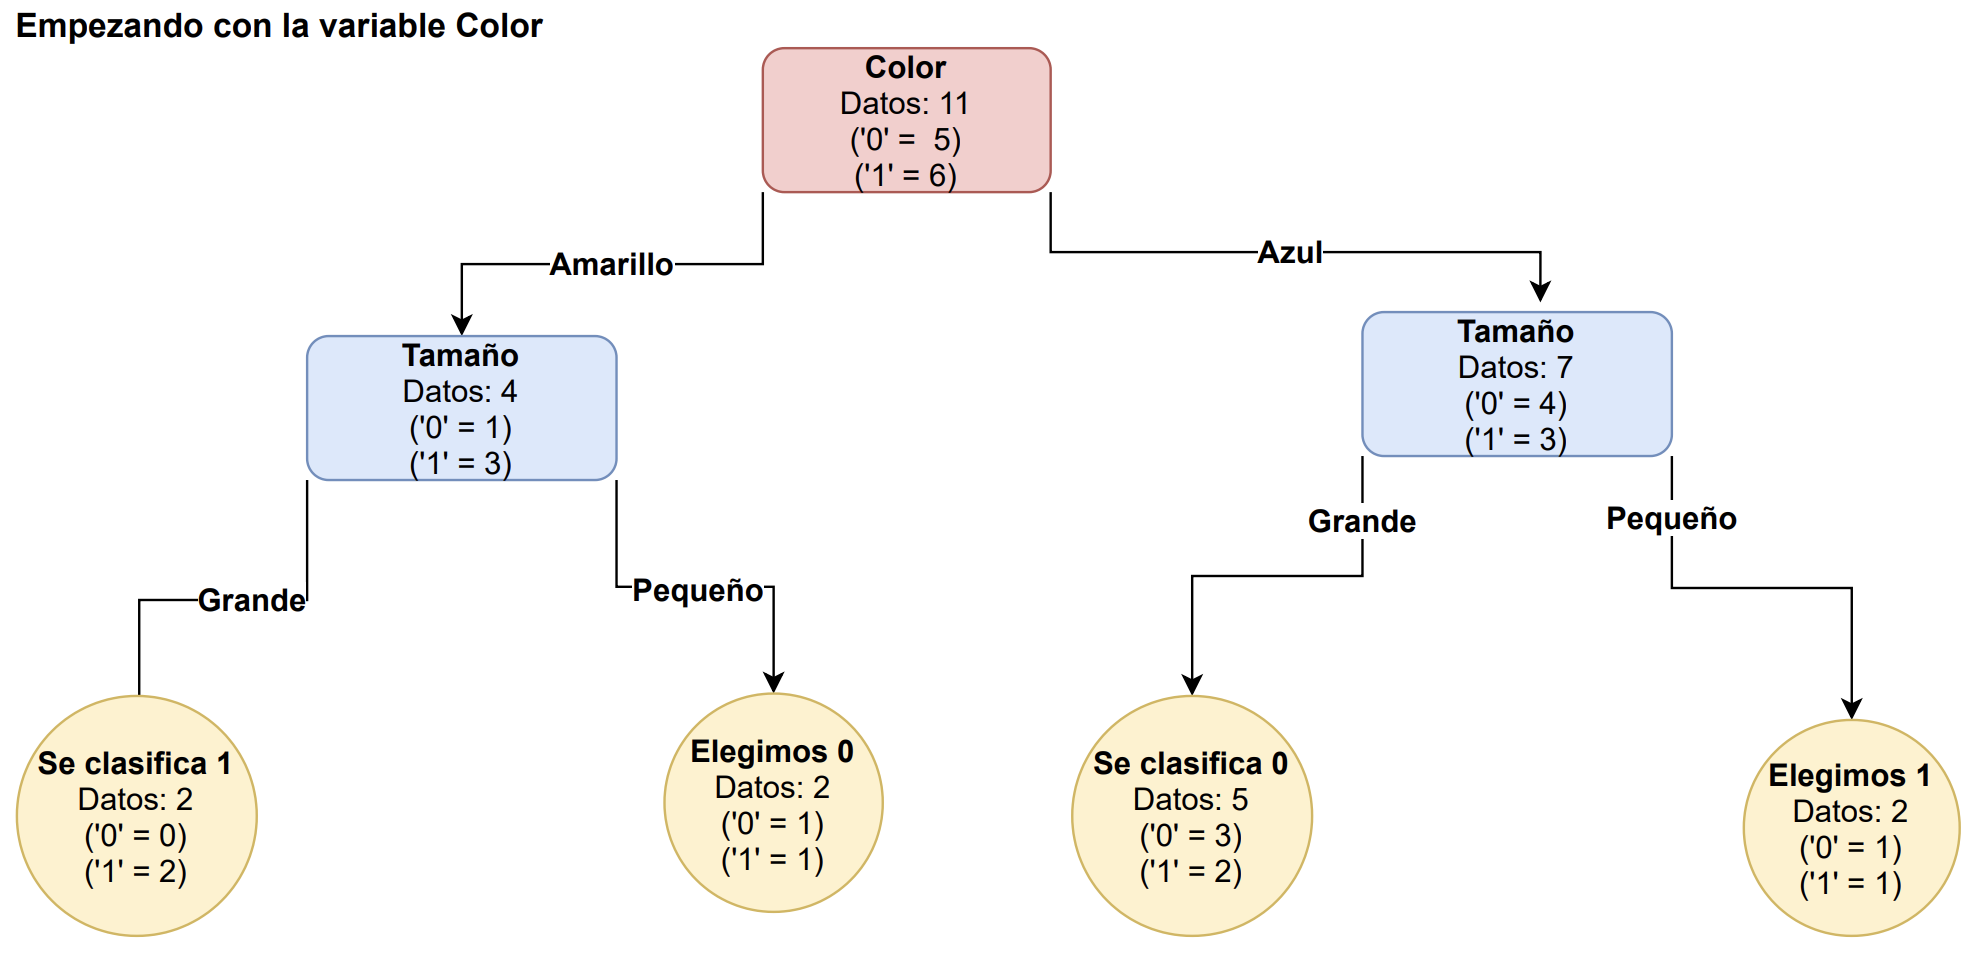

# Ejercicio 2: [25 puntos] En este ejercicio vamos a usar la tabla de datos `potabilidad_v2.csv`, que contiene diferentes métricas de calidad del agua para cuerpos de agua distintos. Para esta tabla, las 9 primeras columnas corresponden a las variables predictoras y la variable `Potability` es la variable a predecir, la cual indica si el agua es segura para el consumo humano o no.



In [2]:
datos = pd.read_csv('../datos/potabilidad_V2.csv',delimiter=',',decimal=".",index_col = 0)
print("datos.shape: ", datos.shape, "\n")
print(datos.info(), "\n")
datos.head()

datos.shape:  (2011, 10) 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 4 to 3272
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   object 
dtypes: float64(9), object(1)
memory usage: 172.8+ KB
None 



,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
4,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,No
5,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,No
6,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,No
7,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,No
8,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,No


## 1. Utilice el método de Árboles de Decisión en `Python` para generar un modelo predictivo para la tabla `potabilidad_v2.csv` usando el 75% de los datos para la tabla aprendizaje y un 25 % para la tabla testing. Use los parámetros por defecto.


In [3]:
# Usamos los parámetros por defecto
instancia_arbol = DecisionTreeClassifier(random_state=0)

analisis = Analisis_Predictivo(datos,predecir= "Potability",modelo=instancia_arbol,estandarizar= True,
                                       train_size= 0.75, random_state=0)


## 2. Calcule los índices de precisión e interpréte los resultados.

In [4]:
resultados = analisis.fit_predict_resultados()


Matriz de Confusión:
[[202 107]
 [ 95  99]]

Precisión Global:
0.5984095427435387

Error Global:
0.40159045725646125

Precisión por categoría:
         No        Si
0  0.653722  0.510309


## 3. Explique el funcionamiento de los parámetros `max_depth` y `min_samples_split`. Genere un modelo de árboles de decisión variando los valores para estos parámetros e intente mejorar los resultados obtenidos del modelo anterior.

+ `max_depth`: Indica la profundidad máxima del árbol.

+ `min_samples_split`: El número mínimo de muestras necesarias para distinguir un nodo interno.


In [33]:
instancia_arbol = DecisionTreeClassifier(criterion= "gini", max_depth = 9, min_samples_split= 8,random_state=0)

analisis2 = Analisis_Predictivo(datos,predecir= "Potability",modelo=instancia_arbol, 
                                       train_size= 0.75, random_state=0)

resultados = analisis2.fit_predict_resultados()



Matriz de Confusión:
[[263  46]
 [110  84]]

Precisión Global:
0.6898608349900597

Error Global:
0.3101391650099403

Precisión por categoría:
         No       Si
0  0.851133  0.43299


## 4. Grafique el árbol del mejor modelo generado anteriormente e interprete al menos dos reglas que se puedan extraer del mismo. Si es necesario pode el árbol para que las reglas sean legibles.

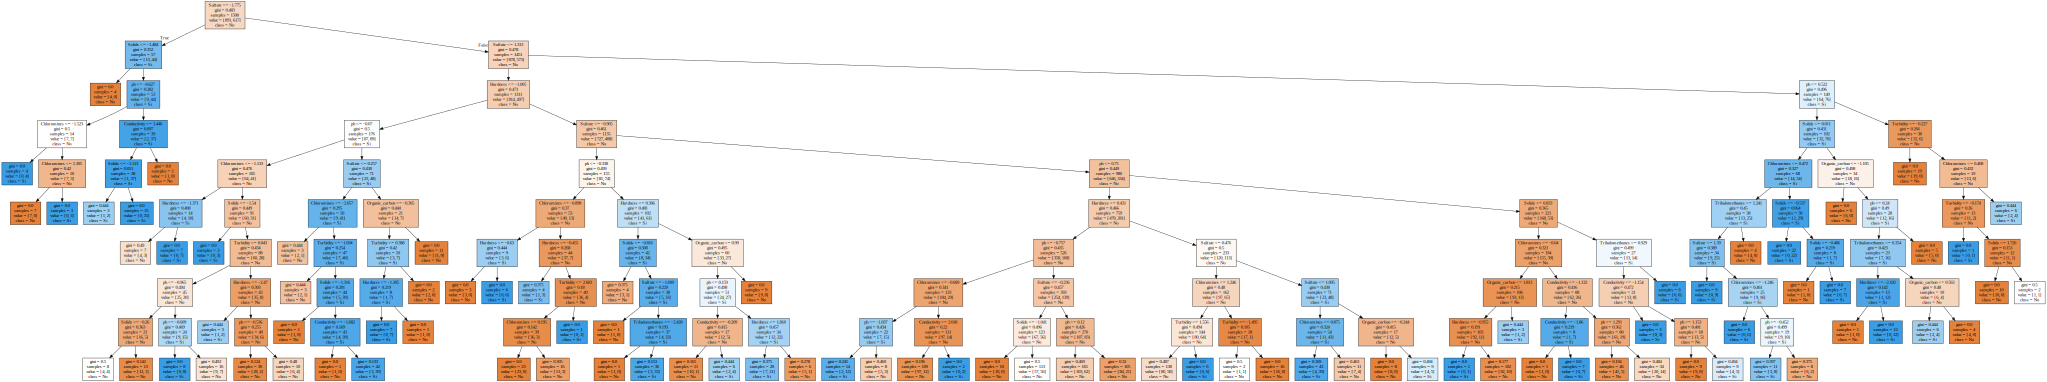

In [6]:
datos_plotear = export_graphviz(analisis2.modelo, out_file=None,class_names=analisis2.nombre_clases,
                feature_names=analisis2.predictoras, filled=True)
grafico = graphviz.Source(datos_plotear)
grafico

## 5. Construya un `DataFrame` que compare el modelo de árboles construido arriba con el mejor modelo construido en la tarea anterior para la tabla `potabilidad_v2.csv`. Para esto en cada una de las filas debe aparecer un modelo predictivo y en las columnas aparezcan los índices Precisión Global, Error Global, Precisión Positiva (PP) y Precisión Negativa (PN). ¿Cuál de los modelos es mejor para estos datos? Guarde los datos de este DataFrame, ya que se irá modificando en próximas tareas.

+ Arboles

In [34]:
resultados.pop("Matriz de Confusión")

categorias = resultados["Precisión por categoría"]

resultados.pop("Precisión por categoría")

categorias = categorias.rename(columns={'No': 'PN', 'Si':"PP"},index = {0:'arboles'})


Arboles = pd.concat([pd.DataFrame([resultados], index = ['arboles']), categorias], axis=1)

+ KNN

In [35]:
instancia_knn = KNeighborsClassifier(n_neighbors=3,algorithm='brute',p=3)

analisis3 = Analisis_Predictivo(datos,predecir= "Potability",modelo=instancia_knn, 
                                       train_size= 0.75, random_state=0)

resultados = analisis3.fit_predict_resultados()


Matriz de Confusión:
[[235  74]
 [105  89]]

Precisión Global:
0.6441351888667992

Error Global:
0.3558648111332008

Precisión por categoría:
         No        Si
0  0.760518  0.458763


In [36]:
resultados.pop("Matriz de Confusión")

categorias = resultados["Precisión por categoría"]

resultados.pop("Precisión por categoría")

categorias = categorias.rename(columns={'No': 'PN', 'Si':"PP"}, index = {0:'KNN'})


KNN = pd.concat([pd.DataFrame([resultados], index = ['KNN']), categorias], axis=1)

In [37]:
indices = pd.concat([Arboles, KNN], axis=0)

indices

,Precisión Global,Error Global,PN,PP
arboles,0.689861,0.310139,0.851133,0.432990
KNN,0.644135,0.355865,0.760518,0.458763


El mejor modelo para estos datos es Arboles, tiene los mejores indices para todos los casos

In [40]:
indices.to_csv('tabla_comparativa1.csv', index = True)

#  Pregunta 3: [25 puntos] Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir de forma diagnóstica si un paciente tiene diabetes o no, basándose en determinadas medidas de diagnóstico incluidas en el conjunto de datos.

## 1. Cargue en Python la tabla de datos `diabetes.csv`.

In [17]:
datos = pd.read_csv('../datos/diabetes_V2.csv',delimiter=',',decimal=".",index_col=0)
print(datos.info(), "\n")
print(datos.shape)

# Convierte las variables de object a categórica
datos['genero'] = datos['genero'].astype('category')

#Convertimos a Dummy algunas de las variables predictoras
datos = pd.get_dummies(datos,columns=["genero"])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 390 entries, 1 to 390
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   colesterol     390 non-null    int64  
 1   glucosa        390 non-null    int64  
 2   hdl_chol       390 non-null    int64  
 3   prop_col_hdl   390 non-null    float64
 4   edad           390 non-null    int64  
 5   genero         390 non-null    object 
 6   altura         390 non-null    int64  
 7   peso           390 non-null    int64  
 8   IMC            390 non-null    float64
 9   ps_sistolica   390 non-null    int64  
 10  ps_diastolica  390 non-null    int64  
 11  cintura        390 non-null    int64  
 12  caderas        390 non-null    int64  
 13  prop_cin_cad   390 non-null    float64
 14  diabetes       390 non-null    object 
dtypes: float64(3), int64(10), object(2)
memory usage: 48.8+ KB
None 

(390, 15)


## 2. Use el método de Árboles de Decisión en `Python` para generar un modelo predictivo para la tabla diabetes.csv usando el 75% de los datos para la tabla aprendizaje y un 25 % para la tabla testing. Use los mejores parámetros que pueda identificar.

In [40]:
# Usamos los parámetros por defecto
instancia_arbol = DecisionTreeClassifier(criterion= "gini", max_depth = 20, min_samples_split= 8,random_state=0)

analisis = Analisis_Predictivo(datos,predecir= "diabetes",modelo=instancia_arbol,estandarizar= True,
                                       train_size= 0.75, random_state=0)
resultados = analisis.fit_predict_resultados()


Matriz de Confusión:
[[10 10]
 [ 3 75]]

Precisión Global:
0.8673469387755102

Error Global:
0.13265306122448983

Precisión por categoría:
   Diabetes  No diabetes
0       0.5     0.961538


## 3. Grafique el árbol generado e interprete al menos dos reglas que se puedan extraer del mismo. Si es necesario pode el árbol para que las reglas sean legibles.

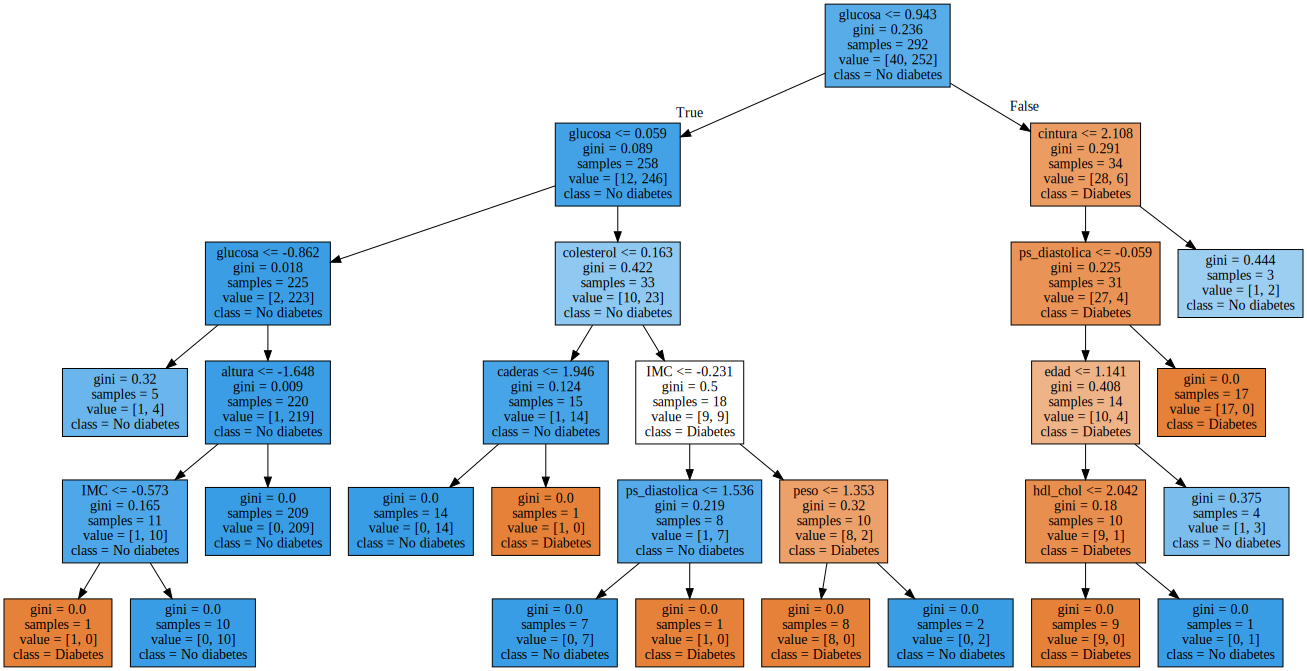

In [41]:

datos_plotear = export_graphviz(analisis.modelo, out_file=None,class_names=analisis.nombre_clases,
                feature_names=analisis.predictoras, filled=True)
grafico = graphviz.Source(datos_plotear)
grafico

## 4. Genere de nuevo un modelo predictivo con el método de Árboles de decisión pero esta vez utilice selección de 6 variables. ¿Mejora el resultado respecto al modelo generado con todas las variables?

<AxesSubplot:>

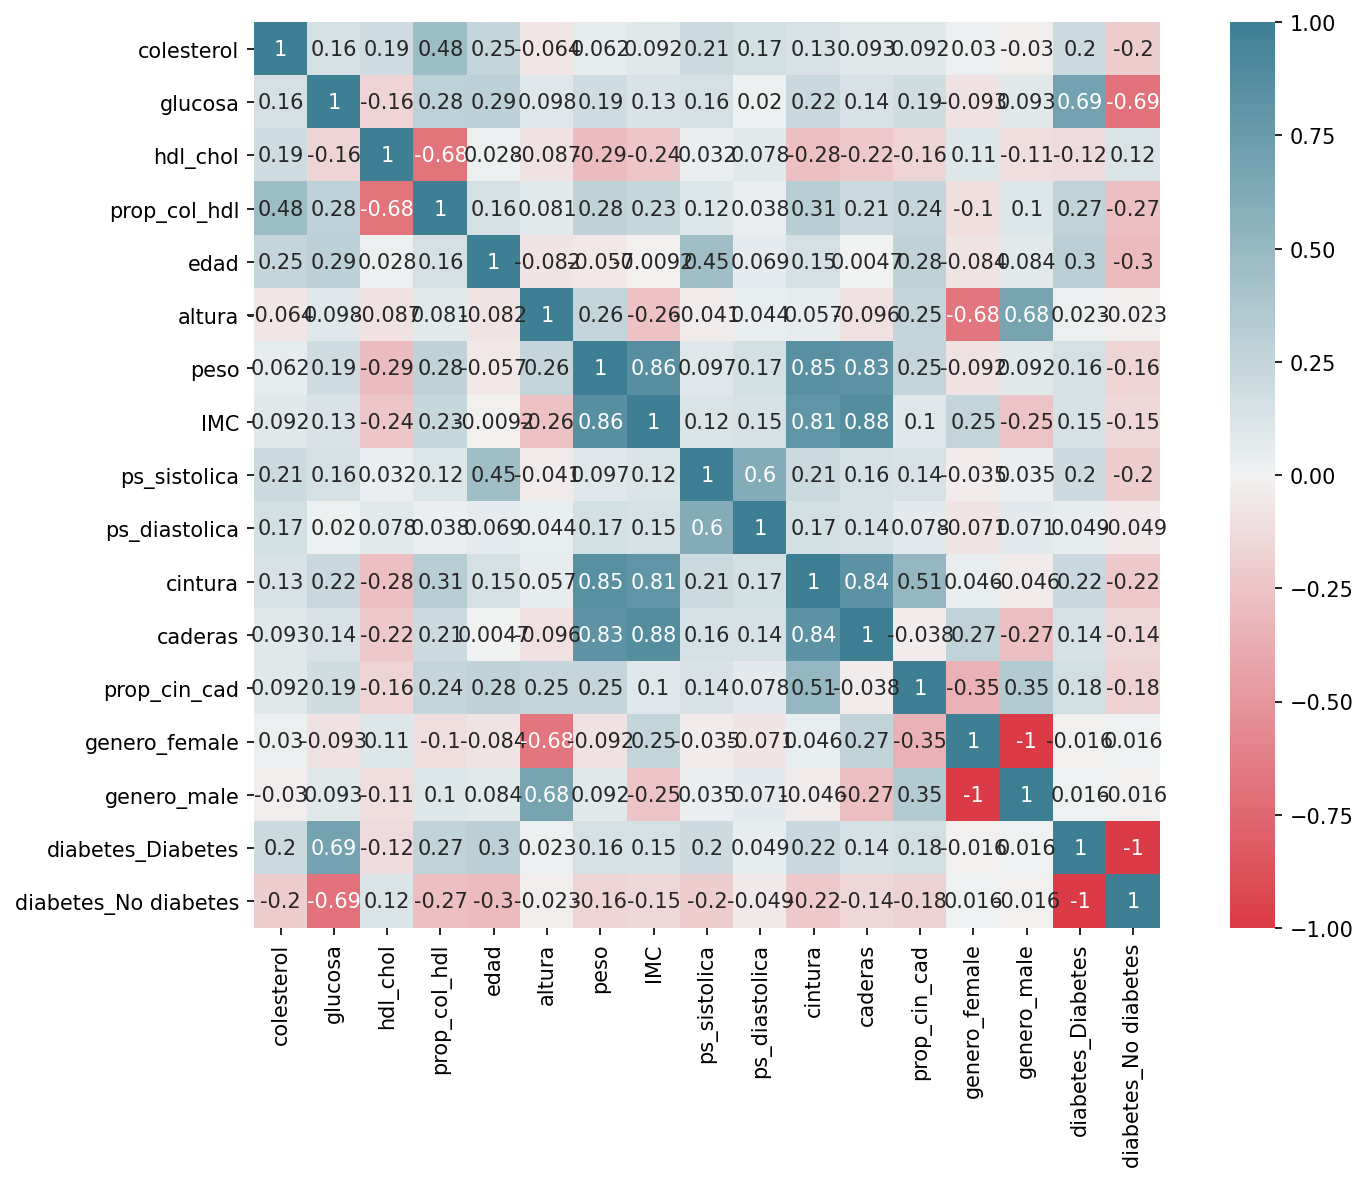

In [44]:
import seaborn as sns

datos1 = datos


# Convierte las variables de object a categórica
datos1['diabetes'] = datos1['diabetes'].astype('category')

#Convertimos a Dummy algunas de las variables predictoras
datos1 = pd.get_dummies(datos1,columns=["diabetes"])

corr = datos1.corr()
fig, ax = plt.subplots(figsize=(12, 8), dpi = 150)

paleta = sns.diverging_palette(220, 10,as_cmap=True).reversed()

sns.heatmap(corr, vmin= -1, vmax=1, cmap= paleta,
            square=True, annot=True, ax=ax)

In [51]:
datos1 = datos[["colesterol","glucosa","prop_col_hdl","edad","ps_sistolica","cintura","diabetes"]]

datos1

,colesterol,glucosa,prop_col_hdl,edad,ps_sistolica,cintura,diabetes
1,193,77,3.9,19,118,32,No diabetes
2,146,79,3.6,19,108,33,No diabetes
3,217,75,4.0,20,110,40,No diabetes
4,226,97,3.2,20,122,31,No diabetes
5,164,91,2.4,20,122,32,No diabetes
...,...,...,...,...,...,...,...
386,227,105,5.2,83,150,35,No diabetes
387,226,279,4.3,84,144,41,Diabetes
388,301,90,2.6,89,218,31,No diabetes
389,232,184,2.0,91,170,35,Diabetes


In [53]:
# Usamos los parámetros por defecto
instancia_arbol = DecisionTreeClassifier(criterion= "gini", max_depth = 20, min_samples_split= 8,random_state=0)

analisis = Analisis_Predictivo(datos1,predecir= "diabetes",modelo=instancia_arbol,estandarizar= True,
                                       train_size= 0.75, random_state=0)
resultados = analisis.fit_predict_resultados()


Matriz de Confusión:
[[12  8]
 [ 3 75]]

Precisión Global:
0.8877551020408163

Error Global:
0.11224489795918369

Precisión por categoría:
   Diabetes  No diabetes
0       0.6     0.961538


Si mejoran los resultados en 10% para la el diagnóstico positivo.

## 5. Construya un `DataFrame` que compare el mejor modelo de árboles construido arriba con el mejor modelo construido en la tarea anterior para la tabla `diabetes.csv`. Para esto en cada una de las filas debe aparecer un modelo predictivo y en las columnas aparezcan los índices Precisión Global, Error Global, Precisión Positiva (PP) y Precisión Negativa (PN). ¿Cuál de los modelos es mejor para estos datos? Guarde los datos de este `DataFrame`, ya que se irá modificando en próximas tareas.

+ Árboles

In [54]:
resultados.pop("Matriz de Confusión")

categorias = resultados["Precisión por categoría"]

resultados.pop("Precisión por categoría")

categorias = categorias.rename(columns={'No diabetes': 'PN', 'diabetes':"PP"},index = {0:'arboles'})


Arboles = pd.concat([pd.DataFrame([resultados], index = ['arboles']), categorias], axis=1)

+ KNN

In [89]:
instancia_knn = KNeighborsClassifier(n_neighbors=2,algorithm='brute',p=4)

analisis2 = Analisis_Predictivo(datos1,predecir= "diabetes",modelo=instancia_knn, 
                                       train_size= 0.75, random_state=0)

resultados = analisis2.fit_predict_resultados()


Matriz de Confusión:
[[13  7]
 [ 5 73]]

Precisión Global:
0.8775510204081632

Error Global:
0.12244897959183676

Precisión por categoría:
   Diabetes  No diabetes
0      0.65     0.935897


In [90]:
resultados.pop("Matriz de Confusión")

categorias = resultados["Precisión por categoría"]

resultados.pop("Precisión por categoría")

categorias = categorias.rename(columns={'No diabetes': 'PN', 'diabetes':"PP"}, index = {0:'KNN'})


KNN = pd.concat([pd.DataFrame([resultados], index = ['KNN']), categorias], axis=1)

In [91]:
indices = pd.concat([Arboles, KNN], axis=0)

indices

,Precisión Global,Error Global,Diabetes,PN
arboles,0.887755,0.112245,0.60,0.961538
KNN,0.877551,0.122449,0.65,0.935897


Aunque la precisión global más alta fue la de árboles, el modelo que mejor predijo el diagnóstico positivo fue KNN, por lo tanto KNN es el mejor.

In [92]:
indices.to_csv('tabla_comparativa1.2.csv', index = True)

# Pregunta 4: [25 puntos] En este ejercicio vamos a predecir números escritos a mano (Hand Written Digit Recognition), la tabla de aprendizaje está en el archivo `ZipDataTrainCod.csv` y la tabla de testing está en el archivo `ZipDataTestCod.csv`. En la figura siguiente se ilustran los datos:

In [111]:
X_test = pd.read_csv('../datos/ZipDataTestCod.csv',delimiter=';',decimal=".")
X_train = pd.read_csv('../datos/ZipDataTrainCod.csv',delimiter=';',decimal=".")

y_train = X_train["Numero"]
y_test = X_test["Numero"]


## 1. Usando el método de Árboles de Decisión genere un modelo predictivo para la tabla de aprendizaje.


In [112]:
# Usamos los parámetros por defecto
instancia_arbol = DecisionTreeClassifier(criterion= "gini", max_depth = 25, min_samples_split= 15,random_state=0)

analisis = Analisis_Predictivo(X_train,predecir= "Numero",modelo=instancia_arbol,estandarizar= True,
                                       train_size= 0.75, random_state=0)

## 2. Con la tabla de testing calcule la matriz de confusión, la precisión global, el error global y la precisión en cada unos de los dígitos. ¿Son buenos los resultados?

In [113]:
resultados = analisis.fit_predict_resultados()


Matriz de Confusión:
[[276   5   1   5   0   1   1   0   2   0]
 [ 10 108   4   3   4   2   6   1   2   1]
 [  4   2 140   7   5   4   4   1   0   4]
 [  3   0   5 136   1  10   4   2   2   0]
 [  0   1   9   4 154   1   0   1   1   0]
 [  6  10   1   7   5  93   8   4   2   0]
 [  7   3   1   9   2   2 144   0   0   1]
 [  1   2   7   4   6   1   0 137   0   0]
 [  6   5   1  10   4   6   0   0 124   0]
 [  0   2   0   0   0   0   2   0   0 263]]

Precisión Global:
0.863960504662644

Error Global:
0.13603949533735604

Precisión por categoría:
       cero     cinco    cuatro       dos     nueve      ocho      seis  \
0  0.948454  0.765957  0.818713  0.834356  0.900585  0.683824  0.852071   

      siete      tres       uno  
0  0.867089  0.794872  0.985019  


## 3. Construya un DataFrame que compare el mejor modelo de árboles construido arriba con el mejor modelo construido en la tarea anterior para estos datos. Para esto en cada una de las filas debe aparecer un modelo predictivo y en las columnas aparezcan los índices Precisión Global, Error Global, Precisión Positiva (PP) y Precisión Negativa (PN). ¿Cuál de los modelos es mejor para estos datos? Guarde los datos de este DataFrame, ya que se irá modificando en próximas tareas.

+ Árboles

In [114]:
resultados.pop("Matriz de Confusión")

categorias = resultados["Precisión por categoría"]

resultados.pop("Precisión por categoría")

categorias = categorias.rename(index = {0:'arboles'})


Arboles = pd.concat([pd.DataFrame([resultados], index = ['arboles']), categorias], axis=1)

+ KNN

In [115]:
instancia_knn = KNeighborsClassifier(n_neighbors=2,algorithm='brute',p=4)

analisis2 = Analisis_Predictivo(X_train,predecir= "Numero",modelo=instancia_knn, 
                                       train_size= 0.75, random_state=0)

resultados = analisis2.fit_predict_resultados()


Matriz de Confusión:
[[289   0   0   0   0   0   0   1   1   0]
 [  7 119   1   3   0   2   3   1   5   0]
 [  3   0 158   3   3   0   1   0   0   3]
 [  3   1   3 151   1   4   0   0   0   0]
 [  1   2   4   0 161   0   0   3   0   0]
 [  3   6   2   3   4 112   0   2   1   3]
 [  5   2   0   0   0   1 161   0   0   0]
 [  2   3   0   1   2   0   0 150   0   0]
 [  2  13   0   3   2   0   0   6 130   0]
 [  0   0   0   1   0   0   0   0   0 266]]

Precisión Global:
0.9308831596269885

Error Global:
0.06911684037301147

Precisión por categoría:
       cero     cinco    cuatro      dos    nueve      ocho      seis  \
0  0.993127  0.843972  0.923977  0.92638  0.94152  0.823529  0.952663   

      siete      tres       uno  
0  0.949367  0.833333  0.996255  


In [116]:
resultados.pop("Matriz de Confusión")

categorias = resultados["Precisión por categoría"]

resultados.pop("Precisión por categoría")

categorias = categorias.rename(index = {0:'KNN'})

KNN = pd.concat([pd.DataFrame([resultados], index = ['KNN']), categorias], axis=1)

In [117]:
pd.concat([pd.DataFrame([resultados], index = ['KNN']), categorias], axis=1)

,Precisión Global,Error Global,cero,cinco,cuatro,dos,nueve,ocho,seis,siete,tres,uno
KNN,0.930883,0.069117,0.993127,0.843972,0.923977,0.92638,0.94152,0.823529,0.952663,0.949367,0.833333,0.996255


In [118]:
indices = pd.concat([Arboles, KNN], axis=0)

indices

,Precisión Global,Error Global,cero,cinco,cuatro,dos,nueve,ocho,seis,siete,tres,uno
arboles,0.863961,0.136039,0.948454,0.765957,0.818713,0.834356,0.900585,0.683824,0.852071,0.867089,0.794872,0.985019
KNN,0.930883,0.069117,0.993127,0.843972,0.923977,0.926380,0.941520,0.823529,0.952663,0.949367,0.833333,0.996255


El mejor mmodelo en Precisión Global y para todas las categorías fue KNN

In [119]:
indices.to_csv('tabla_comparativa1.3.csv', index = True)